# Fraud Detection: ETHEREUM transactions

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

import pickle

In [2]:
df = pd.read_csv('transaction_dataset.csv', index_col=0)
df.sample(3)

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
6004,3072,0xa0a8bfb5bbef556bb523484f9111ca76ce1ac823,0,70.03,1785.64,150099.35,78,81,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7918,257,0x1c0dffa23f342a62ace37bd4eede6180c40ccbec,1,0.00,36574.23,182871.17,0,5,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3451,519,0x5b36a18ecfbc7f3e959c3e7750f89167720c5d38,0,161.45,0.82,324.53,2,2,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [3]:
df = df.iloc[:,2:]
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 262.6 kB/s eta 0:00:07
    --------------------------------------- 0.0/1.8 MB 262.6 kB/s eta 0:00:07
    --------------------------------------- 0.0/1.8 MB 262.6 kB/s eta 0:00:07
    --------------------------------------- 0.0/1.8 MB 262.6 kB/s eta 0:00:07
    --------------------------------------- 0.0/1.8 MB 262.6 kB/s eta 0:00:07
    --------------------------------------- 0.0/1.8 MB 262.6 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.8 MB 136.5 kB/s eta 0:00:13
   -- ------------------------------------- 0.1/1.8 MB 187.0 kB/s eta 0:00:10
   -- ------------------------------------- 0.1/1.8 MB 187.0 kB/s eta 0:00:10
   -- ------------------------------------- 0.1/1.8 MB 187.0 kB/s eta 0:00:10
   -- -------

In [5]:
pip install packaging

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install --pre pycaret -q

In [4]:
from pycaret.classification import *

In [5]:
setup(df,target="FLAG",session_id=85)

,Description,Value
0,Session id,85
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(9841, 48)"
4,Transformed data shape,"(9841, 48)"
5,Transformed train set shape,"(6888, 48)"
6,Transformed test set shape,"(2953, 48)"
7,Numeric features,45
8,Categorical features,2
9,Rows with missing values,8.7%


In [6]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9936,0.9199,0.9804,0.9907,0.9855,0.9814,0.9814,0.2960
lightgbm,Light Gradient Boosting Machine,0.9936,0.9406,0.9764,0.9947,0.9854,0.9813,0.9814,0.2250
et,Extra Trees Classifier,0.9929,0.9444,0.9679,1.0000,0.9836,0.9791,0.9793,0.1620
xgboost,Extreme Gradient Boosting,0.9925,0.9706,0.9731,0.9927,0.9828,0.9779,0.9781,0.2520
rf,Random Forest Classifier,0.9917,0.9920,0.9672,0.9953,0.9810,0.9757,0.9759,0.2790
gbc,Gradient Boosting Classifier,0.9917,0.9501,0.9731,0.9894,0.9811,0.9758,0.9759,0.8180
dt,Decision Tree Classifier,0.9868,0.7621,0.9679,0.9724,0.9701,0.9616,0.9616,0.0880
knn,K Neighbors Classifier,0.9148,0.9335,0.7692,0.8335,0.7998,0.7458,0.7470,0.1050
ridge,Ridge Classifier,0.8988,0.0000,0.5476,0.9914,0.7049,0.6500,0.6921,0.0730
lda,Linear Discriminant Analysis,0.8987,0.8511,0.5476,0.9902,0.7046,0.6496,0.6915,0.1130


AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=85)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

# As can be seen in the above cell we have two columns which has object type

In [8]:
df.select_dtypes(include=['float','int']).describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [9]:
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,None,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [10]:
df.drop(df[categories], axis=1, inplace=True)

In [11]:
df.fillna(df.median(), inplace=True)

In [12]:
df.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [13]:
# Filtering the features with 0 variance
no_var = df.var() == 0
df.var()[no_var]

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64

In [14]:
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

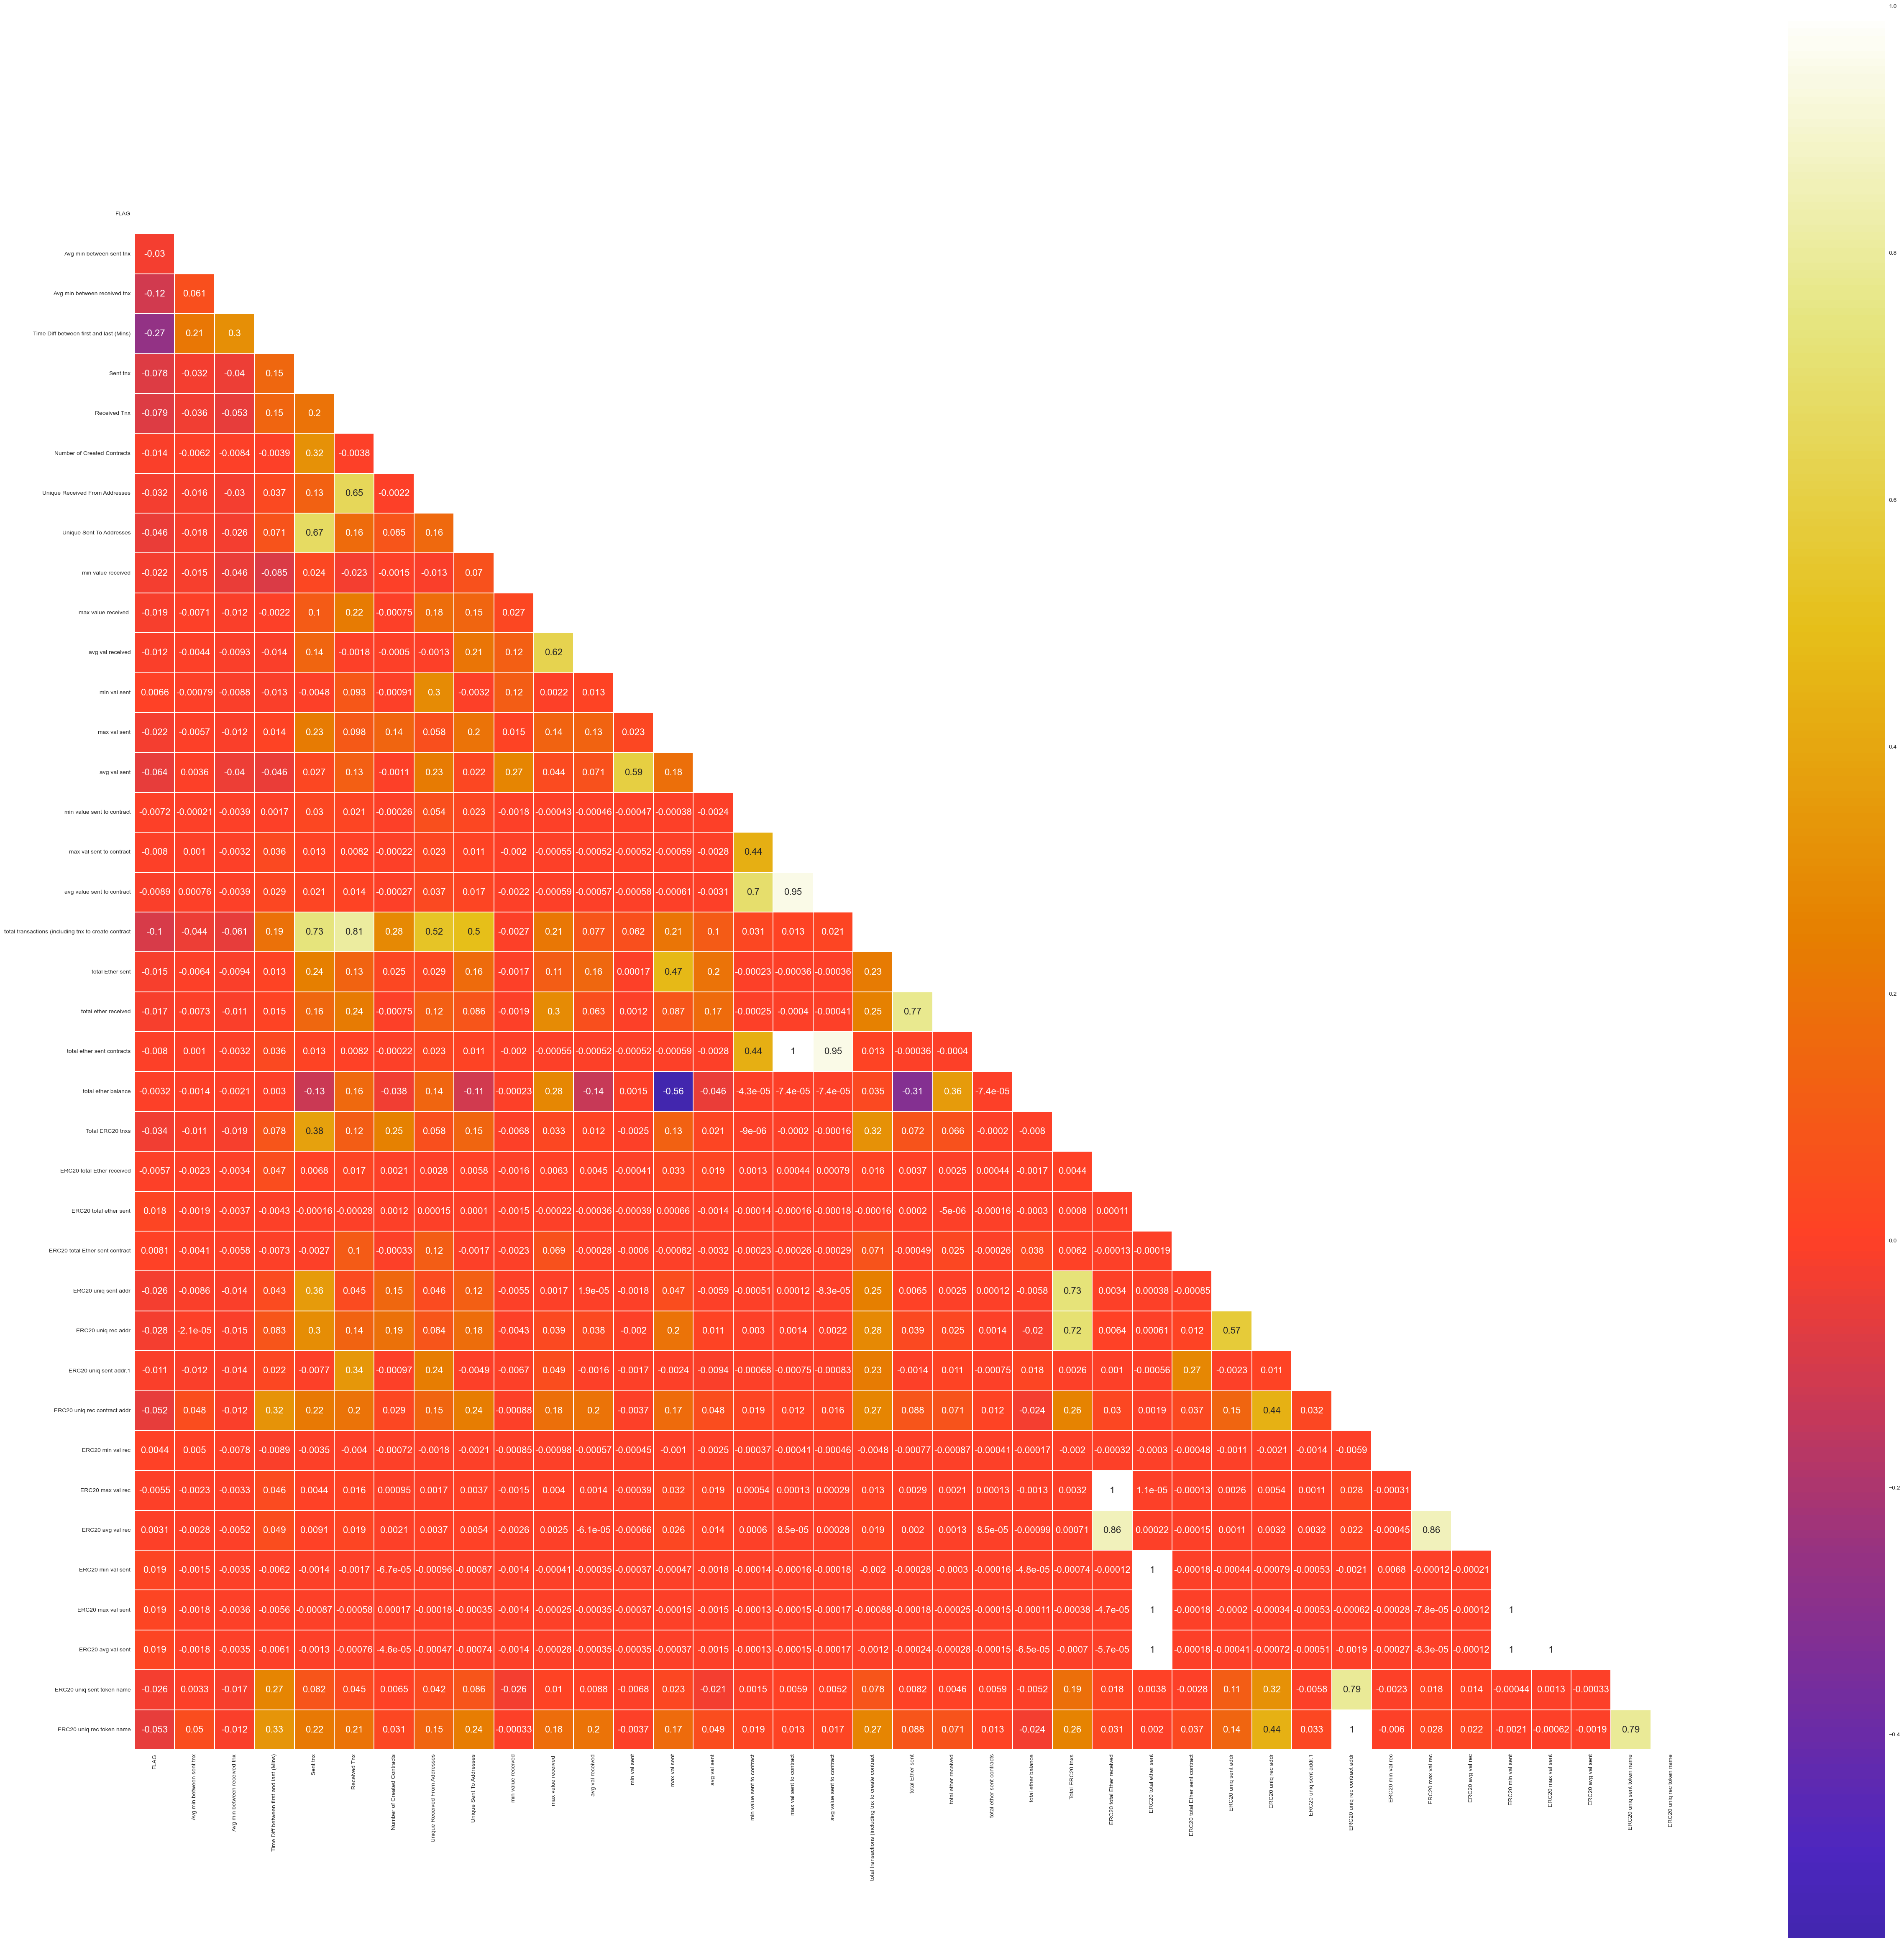

In [15]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(60,60))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True,annot_kws={"size": 16})

In [16]:
drop = ['total transactions (including tnx to create contract',
        'total ether sent contracts', 
        'max val sent to contract',
        ' ERC20 avg val rec',
        ' ERC20 avg val rec',
        ' ERC20 max val rec', 
        ' ERC20 min val rec', 
        ' ERC20 uniq rec contract addr', 
        'max val sent', 
        ' ERC20 avg val sent',
        ' ERC20 min val sent', 
        ' ERC20 max val sent', 
        ' Total ERC20 tnxs', 
        'avg value sent to contract', 
        'Unique Sent To Addresses',
        'Unique Received From Addresses', 
        'total ether received', 
        ' ERC20 uniq sent token name', 
        'min value received', 
        'min val sent', 
        ' ERC20 uniq rec addr' ]
df.drop(drop, axis=1, inplace=True)

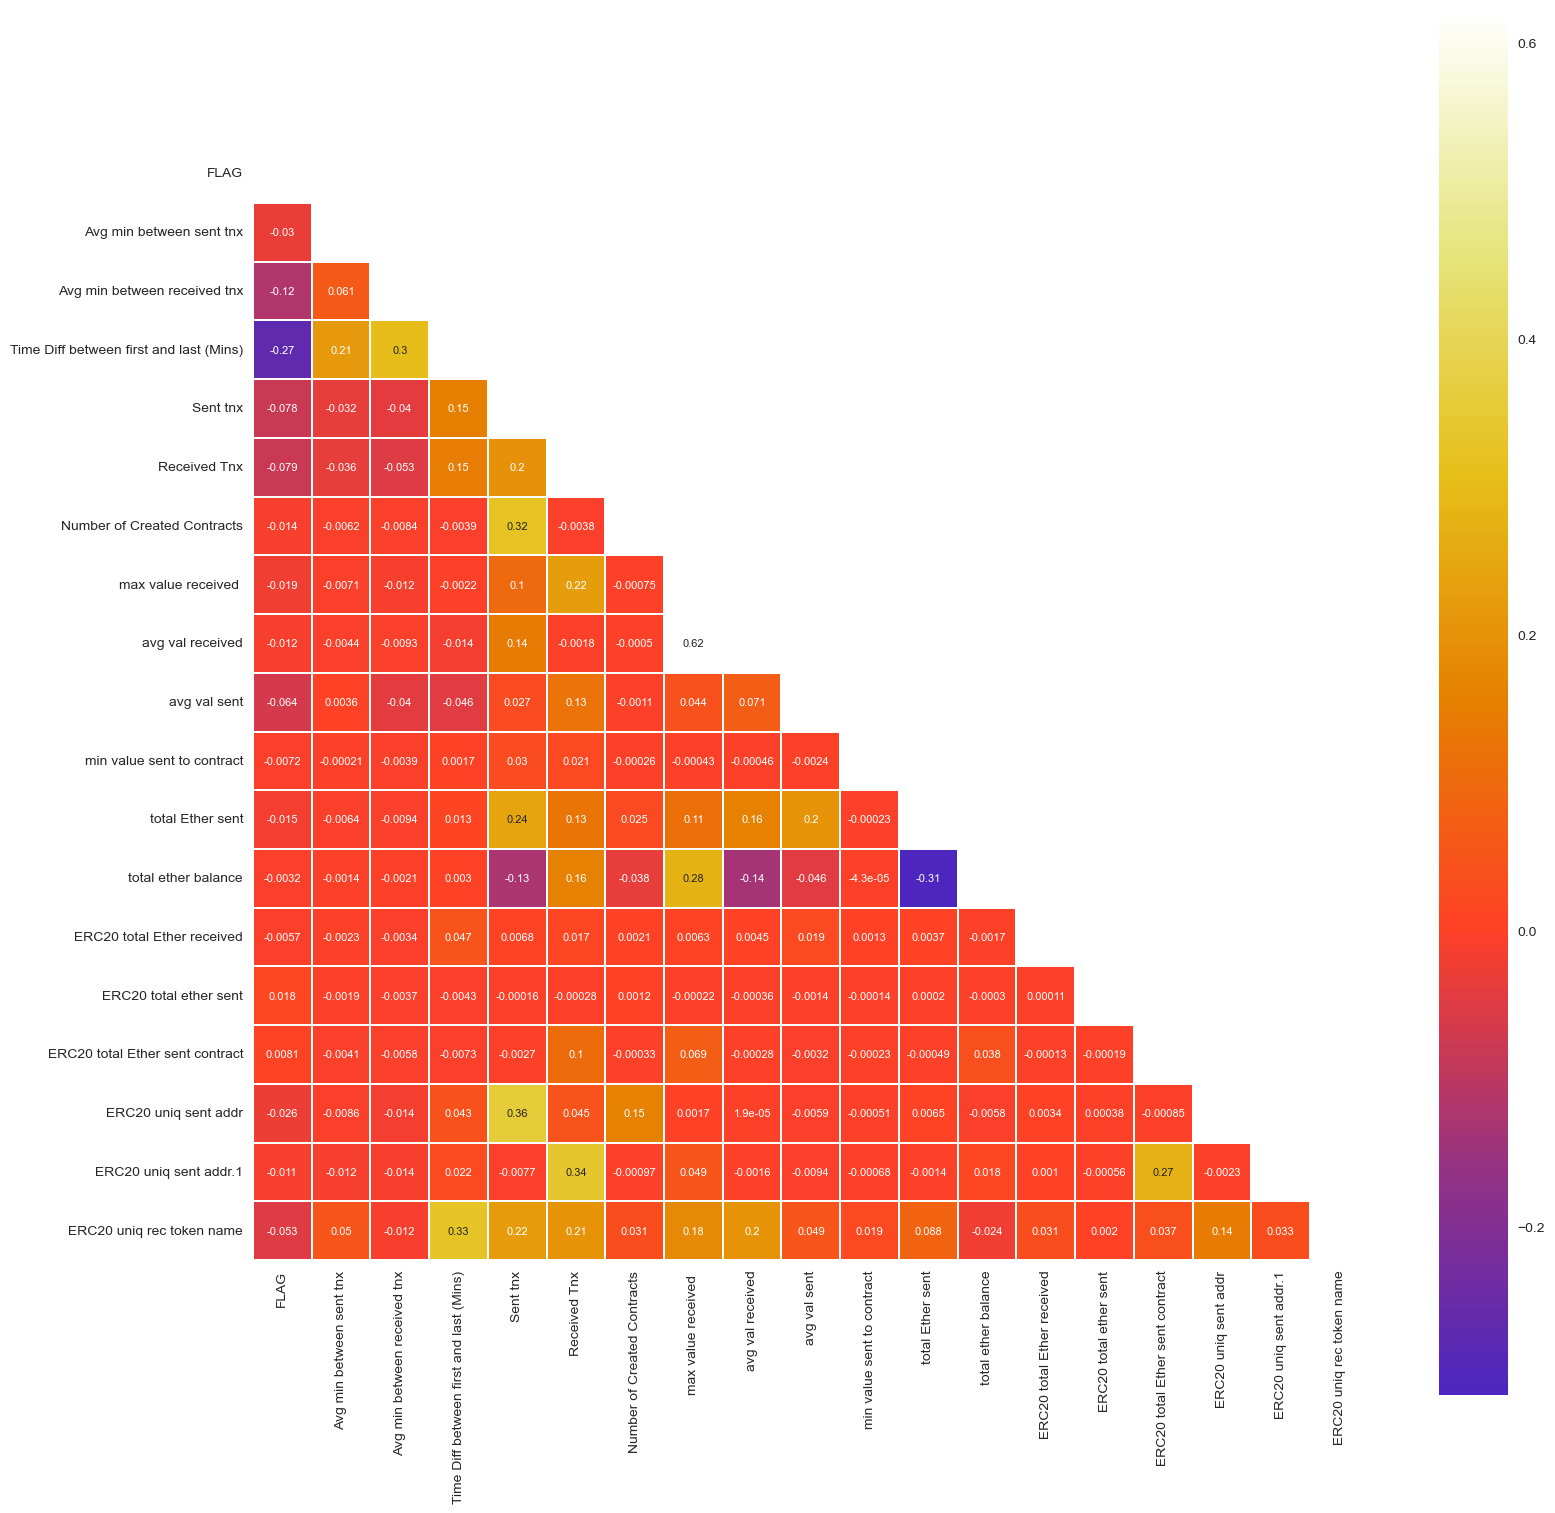

In [17]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,18))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True,annot_kws={"size": 8})

In [18]:
columns = df.columns
columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'min value sent to contract',
       'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec token name'],
      dtype='object')

In [19]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column min value sent to contract has the following distribution: 
0.00    9839
0.02       1
0.01       1
Name: min value sent to contract, dtype: int64
The column  ERC20 uniq sent addr.1 has the following distribution: 
0.0    9813
1.0      26
3.0       1
2.0       1
Name:  ERC20 uniq sent addr.1, dtype: int64


In [20]:
drops = ['min value sent to contract', ' ERC20 uniq sent addr.1']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9841, 17)


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,45.806785,6.589513,1.200681,865.691093,-279.224419,3.558854e+07,3.560317e+07,0.0,30.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,2.613269,0.385685,0.032844,3.087297,-0.001819,4.034283e+02,2.260809e+00,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,1.165453,0.358906,1.794308,3.588616,0.000441,5.215121e+02,0.000000e+00,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,500.000000,99.488840,70.001834,1750.045862,-854.646303,1.711105e+04,1.141223e+04,0.0,2.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,12.802411,2.671095,0.022688,104.318883,-50.896986,1.628297e+05,1.235399e+05,0.0,4.0,27.0


In [21]:
setup(df,target="FLAG",session_id=85)

,Description,Value
0,Session id,85
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(9841, 17)"
4,Transformed data shape,"(9841, 17)"
5,Transformed train set shape,"(6888, 17)"
6,Transformed test set shape,"(2953, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [22]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9845,0.9974,0.9501,0.9790,0.9643,0.9544,0.9546,0.0970
xgboost,Extreme Gradient Boosting,0.9826,0.9971,0.9449,0.9757,0.9600,0.9489,0.9491,0.0640
rf,Random Forest Classifier,0.9765,0.9956,0.9193,0.9731,0.9454,0.9304,0.9311,0.1760
gbc,Gradient Boosting Classifier,0.9747,0.9955,0.9278,0.9568,0.9420,0.9259,0.9261,0.4150
et,Extra Trees Classifier,0.9710,0.9932,0.8990,0.9677,0.9320,0.9136,0.9147,0.1050
dt,Decision Tree Classifier,0.9617,0.9463,0.9187,0.9095,0.9139,0.8893,0.8894,0.0220
ada,Ada Boost Classifier,0.9583,0.9878,0.8970,0.9135,0.9050,0.8783,0.8785,0.1150
knn,K Neighbors Classifier,0.8904,0.9071,0.7167,0.7730,0.7433,0.6738,0.6749,0.0330
lr,Logistic Regression,0.8342,0.8043,0.2616,0.9649,0.4100,0.3490,0.4511,0.1620
svm,SVM - Linear Kernel,0.7824,0.0000,0.2123,0.7986,0.2853,0.2066,0.2995,0.0140


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=85, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [23]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
print(X.shape, y.shape)

(9841, 16) (9841,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 16) (7872,)
(1969, 16) (1969,)


In [26]:
sc = StandardScaler()
sc_train = sc.fit_transform(X_train)
sc_train

array([[-0.03816669,  0.31058135,  2.85111946, ..., -0.0192943 ,
         0.12598745,  1.86839352],
       [-0.23884239, -0.33970711, -0.67581016, ..., -0.0192943 ,
        -0.0588862 , -0.21746385],
       [-0.23808801, -0.32295847,  1.0634945 , ..., -0.0192943 ,
        -0.0588862 , -0.27881259],
       ...,
       [-0.23884239, -0.33970711, -0.6756104 , ..., -0.0192943 ,
        -0.0588862 , -0.27881259],
       [ 0.1160653 ,  0.01204574, -0.06102222, ..., -0.0192943 ,
        -0.0588862 , -0.03341761],
       [-0.23884239, -0.27144567,  0.0246998 , ..., -0.0192943 ,
        -0.0588862 , -0.09476636]])

In [26]:
sc_df = pd.DataFrame(sc_train, columns=X_train.columns)
sc_df

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,-0.038167,0.310581,2.851119,0.001530,-0.133464,-0.025638,-0.031784,-0.130116,-0.170156,-0.026374,-0.008354,-0.051039,-0.011875,-0.019294,0.125987,1.868394
1,-0.238842,-0.339707,-0.675810,-0.153323,-0.176780,-0.025638,-0.043658,-0.183336,-0.209762,-0.028905,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.217464
2,-0.238088,-0.322958,1.063494,1.620329,1.238207,-0.025638,-0.041094,-0.182633,-0.208458,-0.027951,-0.007905,-0.052388,-0.012140,-0.019294,-0.058886,-0.278813
3,-0.238842,0.503169,-0.553119,-0.153323,-0.174717,-0.018987,-0.043563,-0.182076,-0.209762,-0.028905,-0.007917,-0.052388,-0.012140,-0.019294,-0.058886,-0.278813
4,-0.231326,-0.339693,-0.674831,-0.150720,-0.174717,-0.025638,-0.038450,-0.055912,0.027769,-0.028650,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.278813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,-0.238842,-0.320304,-0.672906,-0.152022,-0.174717,-0.025638,-0.043444,-0.179100,-0.193976,-0.028896,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.217464
7868,-0.160852,-0.250448,0.336370,-0.140310,-0.024143,-0.025638,-0.042296,-0.179728,-0.110226,-0.028370,-0.007921,-0.052381,-0.012140,-0.019294,-0.058886,0.027931
7869,-0.238842,-0.339707,-0.675610,-0.152022,-0.175749,-0.025638,-0.043642,-0.182894,-0.208949,-0.028904,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.278813
7870,0.116065,0.012046,-0.061022,-0.140310,-0.161310,-0.025638,0.158200,0.187543,0.827274,-0.023335,-0.007921,-0.052386,-0.012140,-0.019294,-0.058886,-0.033418


In [27]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {sc_train.shape, y_train.shape}')

Shape of the training before SMOTE: ((7872, 16), (7872,))


In [28]:
x_tr_resample, y_tr_resample = oversample.fit_resample(sc_train, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training after SMOTE: ((12230, 16), (12230,))


In [30]:
y_tr_resample.value_counts()

0    6115
1    6115
Name: FLAG, dtype: int64

In [31]:
y_train.value_counts()

0    6115
1    1757
Name: FLAG, dtype: int64

# As can be seen in the above 2 cells data is balanced now

In [32]:
pip install lightgbm

In [33]:
import lightgbm as lgb

In [34]:
lgb_c = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=85, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [35]:
lgb_c.fit(x_tr_resample, y_tr_resample)
sc_test = sc.transform(X_test)
preds_lgb = lgb_c.predict(sc_test)

print(classification_report(y_test, preds_lgb))
print(confusion_matrix(y_test, preds_lgb))

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 6115, number of negative: 6115
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3659
[LightGBM] [Info] Number of data points in the train set: 12230, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Unknown parameter: silent
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1547
           1       0.94      0.97      0.96       422

    accuracy                           0.98      1969
   macro avg       0.97      0.98      0.97      1969
weighted avg       0.98      0.98      0.98      1969

[[1523   24]
 [  13  409]]
